# Metric Volatility Estimation

Measure the volatility of a given metric e.g. AUC for a given model and dataset.

There are two main features implemented in this module
- Volatility Estimation - estimates volatility of target metrics by applying a given methodology. 
- Volatility Parameter Tuning - allows to set parameters in an experiment e.g. train set size, based on the volatility of metrics

The following sections describe these features.

## Volatility Estimation

This section describes different volatility estimation methodology

<img src="schemas/VolatilityEstimation.png" width="800">

The following features are implemented:
- BaseVolatilityEstimator - Base class, provides main functionality with fit method that can be overwritten by subclasses
   - TrainTestVolatility - Estimation of volatility of metrics. The estimation is done by splitting the data into train and test multiple times and training and scoring a model based on these metrics.
       - SplitSeedVolatility - Estimates volatility of metrics based on splitting the data into train and test sets multiple times randomly, each time with different seed.
       - BootstrappedVolatility - stimates volatility of metrics based on splitting the data into train and test with static seed, and bootstrapping train and test set.
   - FoldVolatility - Splits data into train and test set. Then the train test is further split into n folds and the volatility of model trained on each fold separately is estimated on the test set.
   - DelongAUCVolatility - Volatility estimation of AUC based on [DeLong's algorithm](https://www.researchgate.net/profile/Weichao_Xu/publication/264007033_Fast_Implementation_of_DeLong%27s_Algorithm_for_Comparing_the_Areas_Under_Correlated_Receiver_Operating_Characteristic_Curves/links/584a55f508ae5038263d93c0/Fast-Implementation-of-DeLongs-Algorithm-for-Comparing-the-Areas-Under-Correlated-Receiver-Operating-Characteristic-Curves.pdf).
   - CVVolatility - Estimation of volatility metrics based on repeated Cross-Validation
       

In [8]:
import probatus
dir(probatus.metric_volatility)

AttributeError: module 'probatus' has no attribute 'metric_volatility'

ModuleNotFoundError: No module named 'probatus.metric_volatility'

Loading test data from lending club

In [7]:
# loading a dummy model
model = lending_club_model()

# loading original data
data = lending_club(modelling_mode = False)[0]
y = data[['default']]
X = data.drop(['id', 'loan_issue_date','default'], axis = 1)

# defining the metrics we are interested in
evaluators =  {'AUC' : [roc_auc_score,'proba']}

First fitting the localised bootstrap replicates with overlap

In [8]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_seed')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4,1000)

In [9]:
checker.reporting('AUC')

Mean of metric on train is 0.92
Mean of metric on test is 0.71
Mean of delta is 0.21
Standard Deviation of metric on train is 0.00939
Standard Deviation of metric on test is 0.01942
Standard Deviation of delta is 0.02284


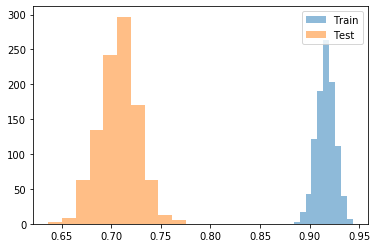

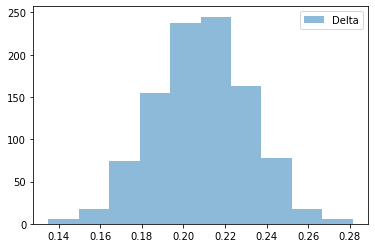

In [10]:
checker.plot('AUC')

Running the estimation with global bootrap non overlapping k folds. 

The number of max folds is determined by the nature of the data: what is the maximum number of folds to ensure there is balanced number of classed in each fold.

In [11]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_global')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.1)

In [12]:
checker.reporting('AUC')

Mean of metric on train is 0.97
Mean of metric on test is 0.66
Mean of delta is 0.31
Standard Deviation of metric on train is 3e-05
Standard Deviation of metric on test is 0.00301
Standard Deviation of delta is 0.00283


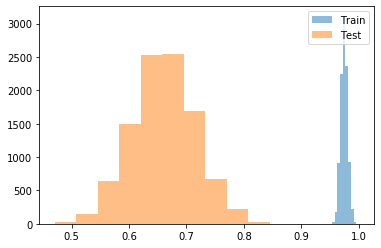

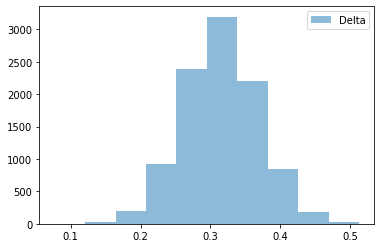

In [13]:
checker.plot('AUC')

In [14]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'delong')

checker.estimate(0.4)

In [15]:
checker.reporting('AUC')

Mean of metric on train is 0.91
Mean of metric on test is 0.69
Mean of delta is 0.22
Standard Deviation of metric on train is 0.00018
Standard Deviation of metric on test is 0.00067
Standard Deviation of delta is 0.0


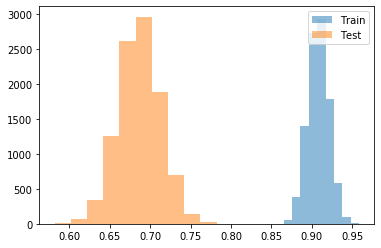

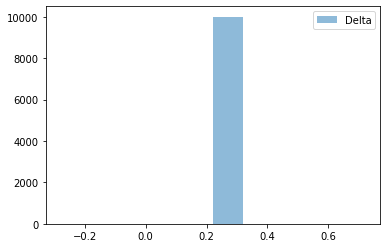

In [16]:
checker.plot('AUC')